In [1]:
import pandas as pd


In [2]:
df=pd.read_csv('textAnalytics-twitter-sentiment-train.csv')
df

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1
...,...,...,...,...,...
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1


In [3]:
df.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [5]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer.fit(df['text'])
len(vectorizer.vocabulary_)

25798

In [6]:
from sklearn.model_selection import train_test_split

df = df[['text','target']]

sentences = df['text'].values
y = df['target'].values

sentences_train, sentences_test, y_train, y_test = train_test_split(df['text'], df['target'], test_size=0.25, random_state=1000)



In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
#vectorizer = CountVectorizer(min_df=0, lowercase=False)
vectorizer = TfidfVectorizer(min_df=0, lowercase=False)
vectorizer.fit(sentences_train)
X_train = vectorizer.transform(sentences_train).toarray()
X_test  = vectorizer.transform(sentences_test).toarray()

from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()
classifier.fit(X_train, y_train)
score = classifier.score(X_test, y_test)
#score = classifier.score(X_train, y_train)
score

0.7951680672268907

In [8]:
from keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=25000)
tokenizer.fit_on_texts(sentences_train)

X_train = tokenizer.texts_to_sequences(sentences_train)
X_test = tokenizer.texts_to_sequences(sentences_test)

vocab_size = len(tokenizer.word_index) + 1  # Adding 1 because of reserved 0 index


All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected
[102, 665, 863, 310, 2878, 3, 1, 2, 3774, 3775, 128, 7, 3776, 2879, 3, 1, 2, 5700]


In [9]:
from keras.preprocessing.sequence import pad_sequences

maxlen = 100

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)


[ 274  294  282   12 1046  362    6  413  414  250 2002 1047 1762    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0]


In [24]:
embedding_dim = 4
from keras.models import Sequential
from keras import layers
model = Sequential()
model.add(layers.Embedding(input_dim=vocab_size, 
                           output_dim=embedding_dim, 
                           input_length=maxlen))
model.add(layers.Flatten())
model.add(layers.Dense(1, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 4)            74072     
_________________________________________________________________
flatten_1 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 401       
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 2         
Total params: 74,475
Trainable params: 74,475
Non-trainable params: 0
_________________________________________________________________


In [25]:
history = model.fit(X_train, y_train,
                    epochs=10,
                    verbose=True,
                    validation_data=(X_test, y_test),
                    batch_size=50)

Epoch 1/10
115/115 [==============================] - 2s 9ms/step - loss: 0.6918 - accuracy: 0.5777 - val_loss: 0.6882 - val_accuracy: 0.5804
Epoch 2/10
115/115 [==============================] - 1s 8ms/step - loss: 0.6874 - accuracy: 0.5767 - val_loss: 0.6768 - val_accuracy: 0.6360
Epoch 3/10
115/115 [==============================] - 1s 8ms/step - loss: 0.6577 - accuracy: 0.7460 - val_loss: 0.6275 - val_accuracy: 0.7216
Epoch 4/10
115/115 [==============================] - 1s 8ms/step - loss: 0.5635 - accuracy: 0.8418 - val_loss: 0.5755 - val_accuracy: 0.7395
Epoch 5/10
115/115 [==============================] - 1s 7ms/step - loss: 0.4645 - accuracy: 0.9163 - val_loss: 0.5489 - val_accuracy: 0.7390
Epoch 6/10
115/115 [==============================] - 1s 7ms/step - loss: 0.3885 - accuracy: 0.9469 - val_loss: 0.5384 - val_accuracy: 0.7311
Epoch 7/10
115/115 [==============================] - 1s 7ms/step - loss: 0.3328 - accuracy: 0.9564 - val_loss: 0.5257 - val_accuracy: 0.7384
Epoch 

{'loss': [0.6909974813461304, 0.6853401064872742, 0.6462104320526123, 0.5488340258598328, 0.45238620042800903, 0.37897789478302, 0.32592540979385376, 0.285904198884964, 0.2550499141216278, 0.23009313642978668], 'accuracy': [0.5692765712738037, 0.5878437757492065, 0.7460150718688965, 0.8428796529769897, 0.9131196141242981, 0.9437729716300964, 0.9567349553108215, 0.9644421339035034, 0.9686459898948669, 0.9719740748405457], 'val_loss': [0.6882331371307373, 0.676818311214447, 0.6275212168693542, 0.5755262970924377, 0.5489375591278076, 0.5383897423744202, 0.5257106423377991, 0.5417380928993225, 0.5436170101165771, 0.5761404037475586], 'val_accuracy': [0.5803571343421936, 0.6360294222831726, 0.7216386795043945, 0.7394958138465881, 0.7389705777168274, 0.7310924530029297, 0.7384454011917114, 0.7247899174690247, 0.7200630307197571, 0.6980041861534119]}


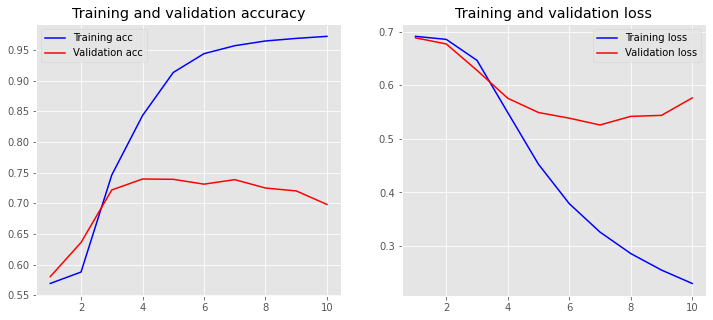

In [26]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()
print(history.history)
plot_history(history)